![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [1]:
my_folder = "/content/drive/MyDrive/Reto-SAS"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/Reto-SAS


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [ ]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.7.15


In [ ]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [2]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 11.3 MB/s 
  Created wheel for saspy: filename=saspy-4.4.0-py3-none-any.whl size=9937189 sha256=162c1a3b48fd47e84389e72e4e643c4482c1928e6ef651919e19bd96b128641d
  Stored in directory: /root/.cache/pip/wheels/78/ce/27/57cfb223c6e6232856fe149e532b99faeaf94b8d47bc273ccb
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [3]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
#'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [4]:
%%writefile .authinfo
oda user a01283727@tec.mx password Chun?Chun!01R

Overwriting .authinfo


Copy this file to home

In [5]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [6]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/Reto-SAS/sascfg_personal.py")
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 364



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/Reto-SAS/sascfg_personal.py
WORK Path             = /saswork/SAS_work667C0000B596_odaws03-usw2.oda.sas.com/SAS_workA0250000B596_odaws03-usw2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.0
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 46486


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [7]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                    Thursday, December  1, 2022 07:31:00 AM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                    Thursday, December  1, 2022 07:31:00 AM

33         


For local Jupyter

In [ ]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

UsageError: Cell magic `%%SAS` not found.


## Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [8]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd1',
libref='cortex'
)

## Merge the Data

In [9]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(5)

#data_merge.head()


,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
911938,2911939.0,SPEAKMAN,FRANKIE,1.0,54.0,20500.0,High School,Rural,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
179716,2179717.0,COPENHAVER,GEORGE,0.0,73.0,11100.0,High School,Downtown,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
567809,2567810.0,MENDOZA,ROBERT,0.0,58.0,55800.0,University / College,City,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
94961,2094962.0,WETHERINGTON,JENETTE,1.0,52.0,12200.0,High School,City,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
927536,2927537.0,SCHILLING,ANTHONY,0.0,28.0,111400.0,University / College,Suburban,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [ ]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  object 
 7   City          1000000 non-null  object 
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       336334 non-null   float64
 12  Frequency     336334 non-null   float64
 13  Seniority     336334 non-null   float64
 14  TotalGift     336334 non-null   float64
 15  MinGift       336334 non-null   float64
 16  MaxGift       336334 non-null   float64
 17  GaveLastYear  1000000 non-nu

## Treat Missing Values

> Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.


In [10]:
# In this case, we are replacing MinGift by 0.
# You can do the same for what you think is reasonable for dealing with the other variables.

data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0)  

data_merge.sample(3)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
399057,2399058.0,HOTTINGER,JACQUELINE,1.0,42.0,55800.0,High School,Rural,4.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
688397,2688398.0,GARCIA,DUANE,0.0,32.0,18100.0,University / College,Suburban,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
336537,2336538.0,MCNAMARA,CARLA,1.0,52.0,31200.0,University / College,Suburban,1.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0


In [ ]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  object 
 7   City          1000000 non-null  object 
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       336334 non-null   float64
 12  Frequency     336334 non-null   float64
 13  Seniority     336334 non-null   float64
 14  TotalGift     336334 non-null   float64
 15  MinGift       1000000 non-null  float64
 16  MaxGift       336334 non-null   float64
 17  GaveLastYear  1000000 non-nu

In [11]:
import numpy as np

In [ ]:
len(data_merge[data_merge['MaxGift']>0])

336334

In [12]:
data_merge[['MaxGift']] = data_merge[['MaxGift']].fillna(value= 0)
data_merge[['TotalGift']] = data_merge[['TotalGift']].fillna(value= 0)   



In [13]:
data_merge['MinGift'] = np.where(((data_merge['MinGift']==0) & (data_merge['GaveLastYear']==1)), data_merge['AmtLastYear'], data_merge['MinGift'])
data_merge['MaxGift'] = np.where(((data_merge['MaxGift']==0) & (data_merge['GaveLastYear']==1)), data_merge['AmtLastYear'], data_merge['MaxGift'])
data_merge['TotalGift'] = np.where(((data_merge['TotalGift']==0) & (data_merge['GaveLastYear']==1)), data_merge['AmtLastYear'], data_merge['TotalGift'])


In [14]:
data_merge[['Recency']] = data_merge[['Recency']].fillna(value=20) 

data_merge['Recency'] = np.where(((data_merge['Recency']==20) & (data_merge['GaveLastYear']==1)), 1, data_merge['Recency'])
data_merge['Recency'] = np.where(((data_merge['Recency']==20) & (data_merge['GaveLastYear']==0)), 10, data_merge['Recency'])


In [15]:
data_merge[['Frequency']] = data_merge[['Frequency']].fillna(value=20) 

data_merge['Frequency'] = np.where(((data_merge['Frequency']==20) & (data_merge['GaveLastYear']==1)), 1, data_merge['Frequency'])
data_merge['Frequency'] = np.where(((data_merge['Frequency']==20) & (data_merge['GaveLastYear']==0)), 10, data_merge['Frequency'])

In [16]:
data_merge[['Seniority']] = data_merge[['Seniority']].fillna(value=20) 

data_merge['Seniority'] = np.where(((data_merge['Seniority']==20) & (data_merge['GaveLastYear']==1)), 1, data_merge['Seniority'])
data_merge['Seniority'] = np.where(((data_merge['Seniority']==20) & (data_merge['GaveLastYear']==0)), 10, data_merge['Seniority'])

In [ ]:
data_merge['Seniority'].value_counts()

10.0    612674
1.0     110441
2.0      46771
3.0      44318
4.0      41385
5.0      37847
6.0      34260
7.0      29766
8.0      24359
9.0      18179
Name: Seniority, dtype: int64

In [17]:
len(data_merge[data_merge['MaxGift']>90])

67248

In [ ]:
data_merge['Recency'].value_counts()

5.0     690100
1.0     102001
2.0      71649
3.0      51106
4.0      36989
6.0      18994
7.0      13278
8.0       8542
9.0       5066
10.0      2275
Name: Recency, dtype: int64

In [ ]:
data_merge['Frequency'].value_counts()

0.0     663666
1.0     203283
2.0      78406
3.0      32034
4.0      13500
5.0       5775
6.0       2218
7.0        792
8.0        244
9.0         67
10.0        15
Name: Frequency, dtype: int64

In [ ]:
data_merge['GaveLastYear'].value_counts()

0.0    877899
1.0    122101
Name: GaveLastYear, dtype: int64

In [ ]:
data_merge['GaveThisYear'].value_counts()

0.0    877768
1.0    122232
Name: GaveThisYear, dtype: int64

In [ ]:
data_merge['Referrals'].value_counts()

0.0     677202
1.0     190891
2.0      74307
3.0      31557
4.0      13960
5.0       6534
6.0       3003
7.0       1385
8.0        661
9.0        291
10.0       118
11.0        54
12.0        20
13.0         7
14.0         6
15.0         3
16.0         1
Name: Referrals, dtype: int64

In [ ]:
data_merge['NbActivities'].value_counts()

0.0     663042
1.0     203841
2.0      78428
3.0      32150
4.0      13416
5.0       5733
6.0       2239
7.0        801
8.0        269
9.0         66
10.0        15
Name: NbActivities, dtype: int64

In [ ]:
len(data_merge[data_merge['TotalGift']>150])

46108

In [ ]:
import seaborn as sns

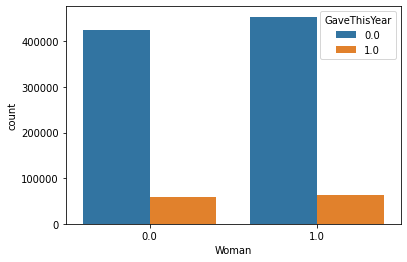

In [ ]:
sns.countplot(x='Woman', hue='GaveThisYear', data=data_merge)

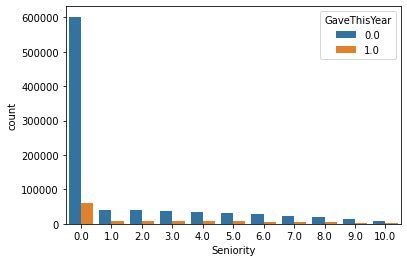

In [ ]:
sns.countplot(x='Seniority', hue='GaveThisYear', data=data_merge)

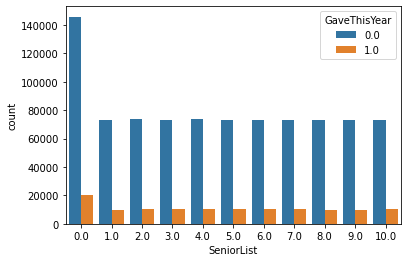

In [ ]:
sns.countplot(x='SeniorList', hue='GaveThisYear', data=data_merge)

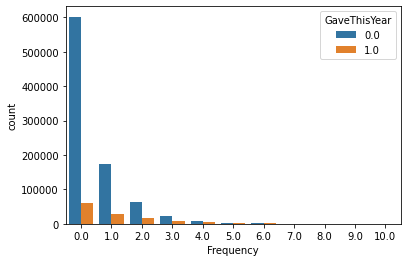

In [ ]:
sns.countplot(x='Frequency', hue='GaveThisYear', data=data_merge)

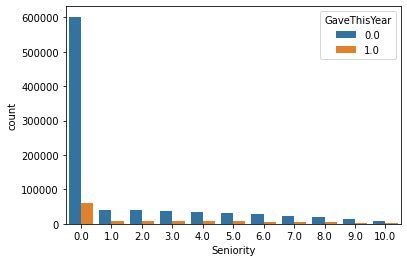

In [ ]:
sns.countplot(x='Seniority', hue='GaveThisYear', data=data_merge)

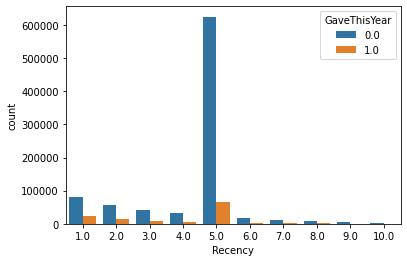

In [ ]:
sns.countplot(x='Recency', hue='GaveThisYear', data=data_merge)

In [344]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Salary')

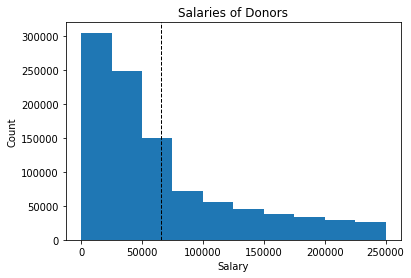

In [ ]:
plt.hist(data_merge.Salary)
plt.axvline(data_merge.Salary.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Salaries of Donors')
plt.ylabel('Count')
plt.xlabel('Salary')

Text(0.5, 0, 'Age')

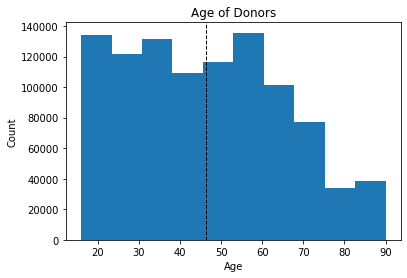

In [ ]:
plt.hist(data_merge.Age)
plt.axvline(data_merge.Age.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Age of Donors')
plt.ylabel('Count')
plt.xlabel('Age')

Text(0.5, 1.0, 'Correlation matrix')

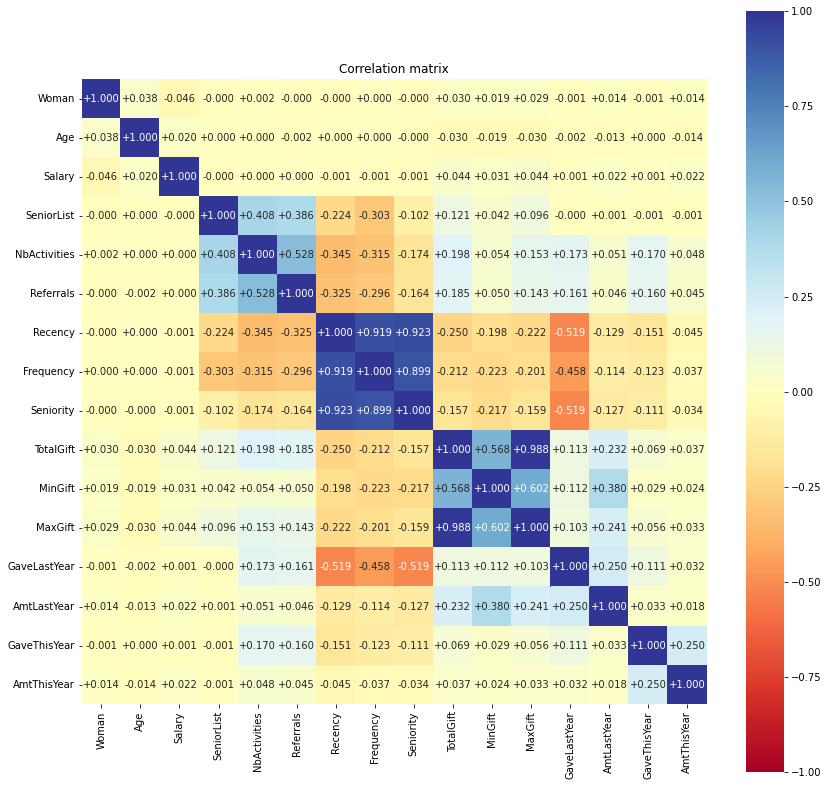

In [345]:
corr_data = data_merge.drop(['ID', 'FirstName', 'LastName'], axis=1)
plt.figure(figsize=(14,14))
sns.heatmap(corr_data.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix")

In [ ]:
data_merge['SeniorList'].value_counts()

0.0     166199
4.0      83914
2.0      83697
6.0      83463
7.0      83380
3.0      83333
10.0     83317
1.0      83241
5.0      83236
9.0      83129
8.0      83091
Name: SeniorList, dtype: int64

In [ ]:
data_merge['City'].value_counts()

City        332657
Suburban    312671
Rural       197978
Downtown    156694
Name: City, dtype: int64

## New Donors

In [ ]:
new_donors = data_merge[data_merge['Frequency']==0]

In [ ]:
new_donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663666 entries, 1 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            663666 non-null  float64
 1   LastName      663651 non-null  object 
 2   FirstName     663663 non-null  object 
 3   Woman         663666 non-null  float64
 4   Age           663666 non-null  float64
 5   Salary        663666 non-null  float64
 6   Education     663666 non-null  object 
 7   City          663666 non-null  object 
 8   SeniorList    663666 non-null  float64
 9   NbActivities  663666 non-null  float64
 10  Referrals     663666 non-null  float64
 11  Recency       663666 non-null  float64
 12  Frequency     663666 non-null  float64
 13  Seniority     663666 non-null  float64
 14  TotalGift     663666 non-null  float64
 15  MinGift       663666 non-null  float64
 16  MaxGift       663666 non-null  float64
 17  GaveLastYear  663666 non-null  float64
 18  AmtL

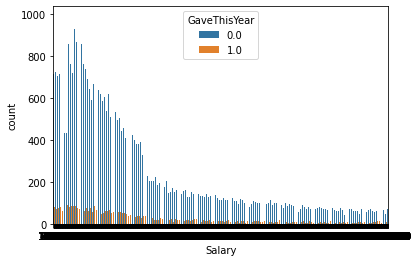

In [ ]:
sns.countplot(x='Salary', hue='GaveThisYear', data=new_donors)

In [ ]:
new_donors['NbActivities'].value_counts()

0.0    528198
1.0    104232
2.0     24337
3.0      5369
4.0      1259
5.0       238
6.0        27
7.0         5
8.0         1
Name: NbActivities, dtype: int64

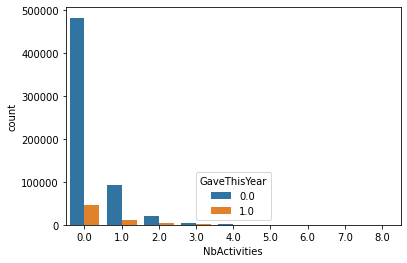

In [ ]:
sns.countplot(x='NbActivities', hue='GaveThisYear', data=new_donors)

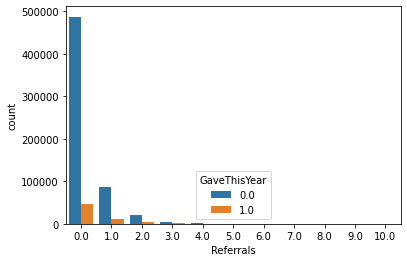

In [ ]:
sns.countplot(x='Referrals', hue='GaveThisYear', data=new_donors)

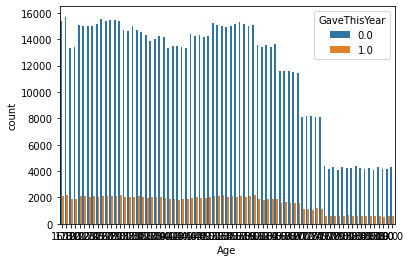

In [ ]:
sns.countplot(x='Age', hue='GaveThisYear', data=data_merge)

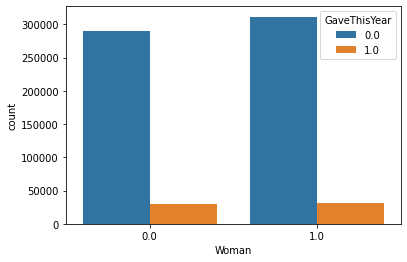

In [ ]:
sns.countplot(x='Woman', hue='GaveThisYear', data=new_donors)

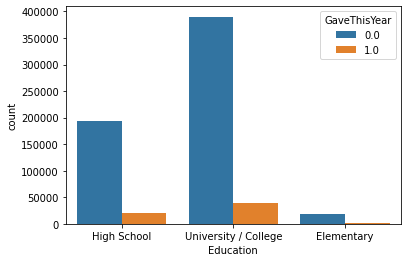

In [ ]:
sns.countplot(x='Education', hue='GaveThisYear', data=new_donors)

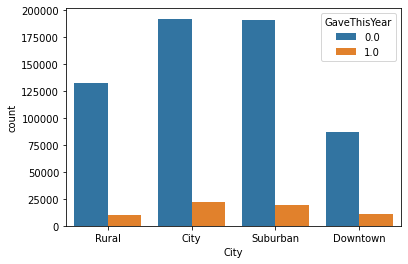

In [ ]:
sns.countplot(x='City', hue='GaveThisYear', data=new_donors)

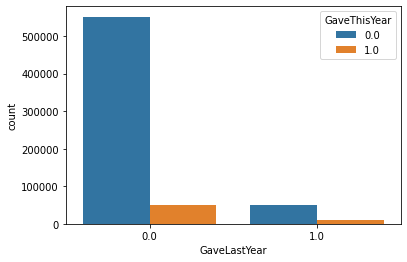

In [ ]:
sns.countplot(x='GaveLastYear', hue='GaveThisYear', data=new_donors)

## New Data

In [18]:
new_data = data_merge
#new_data['AvgGift'] = (data_merge['MinGift'] + data_merge['MaxGift']) / 2

In [19]:
new_data=new_data.join(pd.get_dummies(new_data['City'],prefix="City"),how="inner").copy()

In [20]:
new_data=new_data.join(pd.get_dummies(new_data['Education'],prefix="Education"),how="inner").copy()

In [21]:
new_data.drop(['City', 'Education'], inplace=True, axis=1)

In [ ]:
#new_data.drop(['MinGift', 'MaxGift'], inplace=True,axis=1)

In [22]:
new_data.drop(['LastName', 'FirstName'], inplace=True,axis=1)

In [351]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   ID                              1000000 non-null  float64
 1   Woman                           1000000 non-null  float64
 2   Age                             1000000 non-null  float64
 3   Salary                          1000000 non-null  float64
 4   SeniorList                      1000000 non-null  float64
 5   NbActivities                    1000000 non-null  float64
 6   Referrals                       1000000 non-null  float64
 7   Recency                         1000000 non-null  float64
 8   Frequency                       1000000 non-null  float64
 9   Seniority                       1000000 non-null  float64
 10  TotalGift                       1000000 non-null  float64
 11  MinGift                         1000000 non-null  float64
 12  M

In [23]:
import numpy as np

In [24]:
new_data['is_vip'] = np.where(((new_data['SeniorList']>0) & (new_data['Frequency']>1) & (new_data['TotalGift']>100)), 1, 0)

In [354]:
new_data['is_vip'].value_counts()

0    945808
1     54192
Name: is_vip, dtype: int64

In [25]:
new_data['is_active'] = np.where(((new_data['Recency']<4) & ((new_data['Referrals']>0) | (new_data['NbActivities']>0)) & (new_data['AmtLastYear']>15) & (new_data['GaveLastYear']>0)), 1, 0)

In [356]:
new_data['is_active'].value_counts()

0    948555
1     51445
Name: is_active, dtype: int64

In [26]:
new_data['is_potential'] = np.where(((new_data['Recency'] == 1) & (new_data['GaveLastYear']==1) & (new_data['Frequency']==1) & (new_data['AmtLastYear']>30)), 1, 0)

In [358]:
new_data['is_potential'].value_counts()

0    976776
1     23224
Name: is_potential, dtype: int64

## Scaling

In [ ]:
def simple_feature_scaling(arr):
    arr_max = max(arr)
    new_arr = [i/arr_max for i in arr]

    return new_arr

In [ ]:
scaled_data = new_data
scaled_data['Age'] = simple_feature_scaling(scaled_data['Age'])
scaled_data['Salary'] = simple_feature_scaling(scaled_data['Salary'])
scaled_data['SeniorList'] = simple_feature_scaling(scaled_data['SeniorList'])
scaled_data['NbActivities'] = simple_feature_scaling(scaled_data['NbActivities'])
scaled_data['Referrals'] = simple_feature_scaling(scaled_data['Referrals'])
scaled_data['Salary'] = simple_feature_scaling(scaled_data['Salary'])
scaled_data['Recency'] = simple_feature_scaling(scaled_data['Recency'])
scaled_data['Frequency'] = simple_feature_scaling(scaled_data['Frequency'])
scaled_data['Seniority'] = simple_feature_scaling(scaled_data['Seniority'])
scaled_data['TotalGift'] = simple_feature_scaling(scaled_data['TotalGift'])
scaled_data['AmtLastYear'] = simple_feature_scaling(scaled_data['AmtLastYear'])
scaled_data['AvgGift'] = simple_feature_scaling(scaled_data['AvgGift'])



In [ ]:
scaled_data.head()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,...,GaveThisYear,AmtThisYear,AvgGift,City_City,City_Downtown,City_Rural,City_Suburban,Education_Elementary,Education_High School,Education_University / College
0,2000001.0,0.0,0.277778,0.4288,0.2,0.0,0.0000,0.1,0.2,0.2,...,0.0,0.0,0.0505,1,0,0,0,0,0,1
1,2000002.0,1.0,0.422222,0.0632,0.4,0.1,0.0625,0.5,0.0,0.0,...,0.0,0.0,0.0000,0,0,1,0,0,1,0
2,2000003.0,1.0,0.411111,0.2296,0.5,0.0,0.0000,0.5,0.0,0.0,...,0.0,0.0,0.0000,0,0,1,0,0,0,1
3,2000004.0,1.0,0.866667,0.0948,0.3,0.0,0.0000,0.5,0.0,0.0,...,0.0,0.0,0.0000,0,0,1,0,0,1,0
4,2000005.0,1.0,0.377778,0.2876,0.8,0.0,0.0000,0.5,0.0,0.0,...,0.0,0.0,0.0000,0,0,1,0,0,0,1


## Data Partition

In [122]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(new_data, test_size=0.15, random_state=12345) 

#train.head()
train.sample(2)

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,...,City_City,City_Downtown,City_Rural,City_Suburban,Education_Elementary,Education_High School,Education_University / College,is_vip,is_active,is_potential
627199,2627200.0,0.0,35.0,163300.0,9.0,6.0,4.0,2.0,5.0,9.0,...,0,1,0,0,1,0,0,1,0,0
127211,2127212.0,1.0,16.0,21400.0,8.0,0.0,2.0,10.0,10.0,10.0,...,1,0,0,0,0,0,1,0,0,0


## Prebuilt Models
***

### **Linear Regression Model**


> The [sk-learn library](https://scikit-learn.org/stable/index.html ) offers more advanced models.


In [156]:
from sklearn import linear_model

#comment: it's numpy array
X_train = train[['is_vip', 'is_active', 'is_potential', 'Woman', 'Salary', 'Age', 'NbActivities', 'Referrals', 'Frequency', 'Recency', 'Seniority', 'GaveLastYear', 'AmtLastYear', 'SeniorList', 'TotalGift', 'MinGift', 'MaxGift', 'City_City', 'City_Downtown', 'City_Rural', 'City_Suburban', 'Education_Elementary', 'Education_High School', 'Education_University / College']] 
Y_train = train['AmtThisYear']
X_valid = validation[['is_vip', 'is_active', 'is_potential', 'Woman', 'Salary', 'Age', 'NbActivities', 'Referrals', 'Frequency', 'Recency', 'Seniority', 'GaveLastYear', 'AmtLastYear', 'SeniorList', 'TotalGift', 'MinGift', 'MaxGift', 'City_City', 'City_Downtown', 'City_Rural', 'City_Suburban', 'Education_Elementary', 'Education_High School', 'Education_University / College']] 
Y_valid = validation['AmtThisYear']

regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [157]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

13.107017204092717
6366.037587622954
79.78745257008117


## **Regression Tree Model**

In [140]:
from sklearn.tree import DecisionTreeRegressor

X_train = train[['is_vip', 'is_active', 'is_potential', 'GaveLastYear', 'AmtLastYear', 'SeniorList', 'TotalGift', 'MinGift', 'MaxGift']] 
Y_train = train['AmtThisYear']
X_valid = validation[['is_vip', 'is_active', 'is_potential', 'GaveLastYear', 'AmtLastYear', 'SeniorList', 'TotalGift', 'MinGift', 'MaxGift']] 
Y_valid = validation['AmtThisYear']

DT_model = DecisionTreeRegressor(max_depth=8).fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data


In [141]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

13.129547231010763
6437.212881251552
80.23224340158733


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train = train[['Woman', 'Age', 'Salary', 'NbActivities', 'Referrals', 'AmtLastYear', 'SeniorList', 'Recency', 'Frequency', 'Seniority', 'TotalGift', 'AvgGift', 'City_City', 'City_Downtown', 'City_Rural', 'City_Suburban', 'Education_Elementary', 'Education_High School', 'Education_University / College']] 
Y_train = train['AmtThisYear']
X_valid = validation[['Woman', 'Age', 'Salary', 'NbActivities', 'Referrals', 'AmtLastYear', 'SeniorList', 'Recency', 'Frequency', 'Seniority', 'TotalGift', 'AvgGift', 'City_City', 'City_Downtown', 'City_Rural', 'City_Suburban', 'Education_Elementary', 'Education_High School', 'Education_University / College']] 
Y_valid = validation['AmtThisYear']

lr = LogisticRegression(solver='lbfgs', max_iter=50)
lr.fit(X_train, Y_train)

lr_predict = lr.predict(X_valid)

KeyError: ignored

In [ ]:
#MAE
print(metrics.mean_absolute_error(Y_valid,lr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,lr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,lr_predict)))

7.817375
7825.894125
88.46408381371505


## Random Forest

In [395]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [396]:
modelo_bosque=RandomForestRegressor(n_estimators=50,max_depth=3, random_state=52)

X_train = train[['is_vip', 'is_active', 'is_potential', 'Woman', 'Salary', 'Age', 'NbActivities', 'Referrals', 'Frequency', 'Recency', 'Seniority', 'GaveLastYear', 'AmtLastYear', 'SeniorList', 'TotalGift', 'MinGift', 'MaxGift', 'City_City', 'City_Downtown', 'City_Rural', 'City_Suburban', 'Education_Elementary', 'Education_High School', 'Education_University / College']] 
Y_train = train['AmtThisYear']
X_valid = validation[['is_vip', 'is_active', 'is_potential', 'Woman', 'Salary', 'Age', 'NbActivities', 'Referrals', 'Frequency', 'Recency', 'Seniority', 'GaveLastYear', 'AmtLastYear', 'SeniorList', 'TotalGift', 'MinGift', 'MaxGift', 'City_City', 'City_Downtown', 'City_Rural', 'City_Suburban', 'Education_Elementary', 'Education_High School', 'Education_University / College']] 
Y_valid = validation['AmtThisYear']

modelo_bosque.fit(X_train,Y_train)

modelo_bosque_predict = modelo_bosque.predict(X_valid)

In [397]:
#MAE
print(metrics.mean_absolute_error(Y_valid,modelo_bosque_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,modelo_bosque_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,modelo_bosque_predict)))

13.084757678297999
6383.98515712683
79.8998445375636


## Neural Network

In [32]:
import tensorflow as tf
from keras.layers import Dense
from keras.layers import Dropout

In [105]:
X_train = train[['is_vip', 'is_active', 'is_potential', 'GaveLastYear', 'AmtLastYear', 'SeniorList', 'TotalGift', 'MinGift', 'MaxGift']] 
Y_train = train['AmtThisYear']
X_valid = validation[['is_vip', 'is_active', 'is_potential', 'GaveLastYear', 'AmtLastYear', 'SeniorList', 'TotalGift', 'MinGift', 'MaxGift']] 
Y_valid = validation['AmtThisYear']

In [106]:
X_train.shape

(850000, 9)

In [107]:
modelo_nn = tf.keras.Sequential()

In [108]:
modelo_nn.add(Dense(32, activation='relu', input_dim=9))
modelo_nn.add(Dropout(0.5))
modelo_nn.add(Dense(16, activation='relu'))
modelo_nn.add(Dropout(0.25))
modelo_nn.add(Dense(8, activation='relu'))
modelo_nn.add(Dense(1, activation='linear'))

In [109]:
modelo_nn.compile(
    optimizer='Adam',
    loss='mean_squared_error',
    metrics=['mse'])

In [111]:
modelo_nn.fit(X_train, Y_train,
          batch_size=128,
          epochs=100,
          verbose=1,
          validation_data=(X_valid, Y_valid)
)
modelo_nn.summary()

Epoch 1/100
6641/6641 [==============================] - 12s 2ms/step - loss: 6979.5845 - mse: 6979.5845 - val_loss: 6389.8994 - val_mse: 6389.8994
Epoch 2/100
6641/6641 [==============================] - 12s 2ms/step - loss: 6977.3257 - mse: 6977.3257 - val_loss: 6387.8696 - val_mse: 6387.8696
Epoch 3/100
6641/6641 [==============================] - 12s 2ms/step - loss: 6976.9927 - mse: 6976.9927 - val_loss: 6398.0625 - val_mse: 6398.0625
Epoch 4/100
6641/6641 [==============================] - 12s 2ms/step - loss: 6975.5869 - mse: 6975.5869 - val_loss: 6395.2559 - val_mse: 6395.2559
Epoch 5/100
6641/6641 [==============================] - 12s 2ms/step - loss: 6976.7563 - mse: 6976.7563 - val_loss: 6394.0020 - val_mse: 6394.0020
Epoch 6/100
6641/6641 [==============================] - 12s 2ms/step - loss: 6975.4351 - mse: 6975.4351 - val_loss: 6391.9629 - val_mse: 6391.9629
Epoch 7/100
6641/6641 [==============================] - 13s 2ms/step - loss: 6976.2827 - mse: 6976.2827 - val_l

In [112]:
score = modelo_nn.evaluate(X_valid, Y_valid, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 6394.46044921875
Test accuracy: 6394.46044921875


### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html

***


## Scoring New Data

### Prepare data for scoring

In [99]:
data3 = sas_session.sasdata2dataframe(
table='score_rd1',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)

 ### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [100]:
scoring_data = pd.merge(data3, data4, on=["ID"],how="right")
# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data[['MinGift']] = scoring_data[['MinGift']].fillna(value=0)
scoring_data[['MaxGift']] = scoring_data[['MaxGift']].fillna(value=0)
scoring_data[['TotalGift']] = scoring_data[['TotalGift']].fillna(value=0)
scoring_data[['Frequency']] = scoring_data[['Frequency']].fillna(value=20)
scoring_data[['Recency']] = scoring_data[['Recency']].fillna(value=20)  
scoring_data[['Seniority']] = scoring_data[['Seniority']].fillna(value=20)

scoring_data['MinGift'] = np.where(((scoring_data['MinGift']==0) & (scoring_data['GaveLastYear']==1)), scoring_data['AmtLastYear'], scoring_data['MinGift'])
scoring_data['MaxGift'] = np.where(((scoring_data['MaxGift']==0) & (scoring_data['GaveLastYear']==1)), scoring_data['AmtLastYear'], scoring_data['MaxGift'])
scoring_data['TotalGift'] = np.where(((scoring_data['TotalGift']==0) & (scoring_data['GaveLastYear']==1)), scoring_data['AmtLastYear'], scoring_data['TotalGift'])

scoring_data['Recency'] = np.where(((scoring_data['Recency']==20) & (scoring_data['GaveLastYear']==1)), 1, scoring_data['Recency'])
scoring_data['Recency'] = np.where(((scoring_data['Recency']==20) & (scoring_data['GaveLastYear']==0)), 10, scoring_data['Recency'])

scoring_data['Frequency'] = np.where(((scoring_data['Frequency']==20) & (scoring_data['GaveLastYear']==1)), 1, scoring_data['Frequency'])
scoring_data['Frequency'] = np.where(((scoring_data['Frequency']==20) & (scoring_data['GaveLastYear']==0)), 10, scoring_data['Frequency'])

scoring_data['Seniority'] = np.where(((scoring_data['Seniority']==20) & (scoring_data['GaveLastYear']==1)), 1, scoring_data['Seniority'])
scoring_data['Seniority'] = np.where(((scoring_data['Seniority']==20) & (scoring_data['GaveLastYear']==0)), 10, scoring_data['Seniority'])

#scoring_data['AvgGift'] = (scoring_data['MinGift'] + scoring_data['MaxGift']) / 2

scoring_data=scoring_data.join(pd.get_dummies(scoring_data['City'],prefix="City"),how="inner").copy()
scoring_data=scoring_data.join(pd.get_dummies(scoring_data['Education'],prefix="Education"),how="inner").copy()

scoring_data.drop(['City', 'Education', 'FirstName', 'LastName'], inplace=True, axis=1)

scoring_data['is_vip'] = np.where(((scoring_data['SeniorList']>0) & (scoring_data['Frequency']>1) & (scoring_data['TotalGift']>100)), 1, 0)
scoring_data['is_active'] = np.where(((scoring_data['Recency']<4) & ((scoring_data['Referrals']>0) | (scoring_data['NbActivities']>0)) & (scoring_data['AmtLastYear']>15) & (scoring_data['GaveLastYear']>0)), 1, 0)
scoring_data['is_potential'] = np.where(((scoring_data['Recency'] == 1) & (scoring_data['GaveLastYear']==1) & (scoring_data['Frequency']==1) & (scoring_data['AmtLastYear']>30)), 1, 0)
scoring_data.head()

,ID,GaveLastYear,AmtLastYear,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,...,City_City,City_Downtown,City_Rural,City_Suburban,Education_Elementary,Education_High School,Education_University / College,is_vip,is_active,is_potential
0,2000001.0,0.0,0.0,0.0,25.0,107200.0,2.0,0.0,0.0,1.0,...,1,0,0,0,0,0,1,1,0,0
1,2000002.0,0.0,0.0,1.0,38.0,15800.0,4.0,1.0,1.0,10.0,...,0,0,1,0,0,1,0,0,0,0
2,2000003.0,0.0,0.0,1.0,37.0,57400.0,5.0,0.0,0.0,10.0,...,0,0,1,0,0,0,1,0,0,0
3,2000004.0,0.0,0.0,1.0,78.0,23700.0,3.0,0.0,0.0,10.0,...,0,0,1,0,0,1,0,0,0,0
4,2000005.0,0.0,0.0,1.0,34.0,71900.0,8.0,0.0,0.0,10.0,...,0,0,1,0,0,0,1,0,0,0


In [160]:
# In this case, based on MSE (Mean Squared Error) criterion,
# the linear regression model performed better than the regression tree.

X = scoring_data[['is_vip', 'is_active', 'is_potential', 'Woman', 'Salary', 'Age', 'NbActivities', 'Referrals', 'Frequency', 'Recency', 'Seniority', 'GaveLastYear', 'AmtLastYear', 'SeniorList', 'TotalGift', 'MinGift', 'MaxGift', 'City_City', 'City_Downtown', 'City_Rural', 'City_Suburban', 'Education_Elementary', 'Education_High School', 'Education_University / College']] 
regr_predict_end=regr.predict(X)

scoring_data['Prediction'] = regr_predict_end
scoring_data.sort_values(by=['Prediction'], inplace=True,ascending=False)

## Exporting Results to a CSV File

In [161]:
scoring_data = scoring_data.astype({'ID':'int'})

Result= scoring_data[['ID','Prediction']]
#Result.to_csv('Round1_Output.csv', index=False)

In [162]:
Result.head()

,ID,Prediction
411095,2411096,137.837105
265979,2265980,130.019247
371230,2371231,128.287228
132410,2132411,124.056933
420890,2420891,122.855136


In [163]:
Result.loc[60000]

ID            2.060001e+06
Prediction    3.527239e+00
Name: 60000, dtype: float64

In [164]:
# Define your cutoff and choose a number of rows to submit to the leaderboard

NB = 100000
submission = Result.head(NB)
submission.to_csv('Round1 Output.csv', index=False)

In [ ]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.


In [155]:
!head Round1\ Output.csv

ID,Prediction
2411096,280.9716395003328
2449488,207.87213429295704
2920575,200.52881465196413
2300118,190.684181870266
2758425,177.70727827031345
2371231,159.2866964556274
2251768,158.99738297744082
2265980,158.9867331962961
2074508,157.7868801589707
